In [423]:
# Importando bibliotecas

import pandas as pd
import numpy as np

In [424]:
# Carregando arquivos

url_sellers = 'https://raw.githubusercontent.com/OtavioSotnas/Trabalhinho-Ada-PT2/main/base%20de%20dados/olist_sellers_dataset.csv'
url_order_items = 'https://raw.githubusercontent.com/OtavioSotnas/Trabalhinho-Ada-PT2/main/base%20de%20dados/olist_order_items_dataset.csv'
url_products = 'https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_products_dataset.csv'

df_sellers = pd.read_csv(url_sellers)
df_order_items = pd.read_csv(url_order_items)
df_products = pd.read_csv(url_products)

# 1. Order Items

## 1.1 Análise dos dados

In [425]:
df_order_items = pd.read_csv(url_order_items)

In [426]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [427]:
print(f'{df_order_items.shape}')

(112650, 7)


In [428]:
df_order_items.info() # A base de dados é constituida por colunas de identificação do pedido, produto, vendedor e data limite de entrega (dtype=object)
                      # e também por colunas de valor e valor do frete dos produtos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [429]:
df_order_items.isnull().sum() # Esses dados não contem valores nulos

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [430]:
df_order_items['product_id'].value_counts(True).head(10) # Produtos que mais são vendidos

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    0.004678
99a4788cb24856965c36a24e339b6058    0.004332
422879e10f46682990de24d770e7f83d    0.004296
389d119b48cf3043d311335e499d9c6b    0.003480
368c6c730842d78016ad823897a372db    0.003444
53759a2ecddad2bb87a079a1f1519f73    0.003311
d1c427060a0f73f6b889a5c7c61f2ac4    0.003045
53b36df67ebb7c41585e8d54d6772e08    0.002867
154e7e31ebfa092203795c972e5804a6    0.002494
3dd2a17168ec895c781a9191c1e95ad7    0.002432
Name: proportion, dtype: float64

In [431]:
df_order_items['total_order_value'] = df_order_items['price'] + df_order_items['freight_value'] # Acrescentanto coluna valor total

In [432]:
df_order_items['shipping_year'] = df_order_items['shipping_limit_date'].str[0:4] # Acrescentando coluna do ano de envio

In [433]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,shipping_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,2017
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,2017
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,2018
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,2017


In [434]:
df_order_items.describe() # Dados estatísticos das colunas numéricas

,order_item_id,price,freight_value,total_order_value
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,140.644059
std,0.705124,183.633928,15.806405,190.724394
min,1.000000,0.850000,0.000000,6.080000
25%,1.000000,39.900000,13.080000,55.220000
50%,1.000000,74.990000,16.260000,92.320000
75%,1.000000,134.900000,21.150000,157.937500
max,21.000000,6735.000000,409.680000,6929.310000


# 2. Sellers

## 2.1 Análise dos dados

In [437]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [438]:
df_sellers.shape

(3095, 4)

In [439]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [440]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [441]:
df_sellers['seller_city'] = df_sellers['seller_city'].str.title()
df_sellers['city_state'] = df_sellers['seller_city'] + ' - ' + df_sellers['seller_state']

In [442]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,city_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP,Campinas - SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP,Mogi Guacu - SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ,Rio De Janeiro - RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP,Sao Paulo - SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP,Braganca Paulista - SP


In [443]:
df_sellers['seller_city'].value_counts(True).head(10)

seller_city
Sao Paulo         0.224233
Curitiba          0.041034
Rio De Janeiro    0.031018
Belo Horizonte    0.021971
Ribeirao Preto    0.016801
Guarulhos         0.016155
Ibitinga          0.015832
Santo Andre       0.014540
Campinas          0.013247
Maringa           0.012924
Name: proportion, dtype: float64

In [444]:
df_sellers['seller_state'].value_counts(True).head(10)

seller_state
SP    0.597415
PR    0.112763
MG    0.078837
SC    0.061389
RJ    0.055250
RS    0.041680
GO    0.012924
DF    0.009693
ES    0.007431
BA    0.006139
Name: proportion, dtype: float64

# 3. Perguntas

## 3.1 Verificar se um produto foi vendido acima do preço do mercado

In [447]:
# Criando array com a média de cada produto
avg_price = np.array(df_order_items.groupby('product_id')['price'].transform('mean'))

In [448]:
# Criando coluna 'overpriced_item' que verifica se o preço é maior que a média
df_order_items['overpriced_item'] = df_order_items['price'] > avg_price

In [513]:
df_order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,shipping_year,overpriced_item
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,2017,False
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,2017,False
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,2018,False
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,2018,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,2017,False
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,34.59,2017,False
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,31.75,2017,True
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,880.75,2018,False
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,157.60,2018,False
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,65.39,2018,False


## 3.2 Categorizar vendedores entre Iniciante, Intermediário, Avançado e Mestre

In [457]:
numero_de_vendas = df_order_items.value_counts('seller_id').to_frame().rename(columns={'count' : 'sales'})

In [451]:
vendedores = pd.merge(df_sellers, numero_de_vendas, on='seller_id')

In [452]:
def categorias_vendedores(vendas):
    if vendas < 40:
        return 'Vendedor Iniciante'
    elif vendas < 90:
        return 'Vendedor Intermediário'
    elif vendas < 200:
        return 'Vendedor Avançado'
    else:
        return 'Vendedor Mestre'

In [453]:
vendedores['seller_level'] = vendedores['sales'].apply(categorias_vendedores)

In [454]:
vendedores.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,city_state,sales,seller_level
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP,Campinas - SP,3,Vendedor Iniciante
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP,Mogi Guacu - SP,41,Vendedor Intermediário
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ,Rio De Janeiro - RJ,1,Vendedor Iniciante
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP,Sao Paulo - SP,1,Vendedor Iniciante
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP,Braganca Paulista - SP,1,Vendedor Iniciante
5,c240c4061717ac1806ae6ee72be3533b,20920,Rio De Janeiro,RJ,Rio De Janeiro - RJ,1,Vendedor Iniciante
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,Brejao,PE,Brejao - PE,36,Vendedor Iniciante
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,Penapolis,SP,Penapolis - SP,33,Vendedor Iniciante
8,768a86e36ad6aae3d03ee3c6433d61df,1529,Sao Paulo,SP,Sao Paulo - SP,17,Vendedor Iniciante
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,Curitiba,PR,Curitiba - PR,192,Vendedor Avançado


<Axes: title={'center': 'Nível dos vendedores na plataforma'}, xlabel='Numero de vendedores', ylabel='Níveis'>

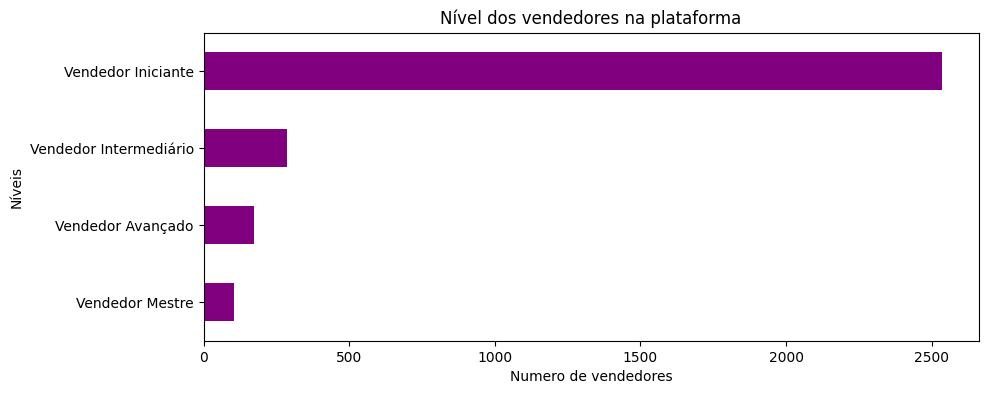

In [455]:
vendedores['seller_level'].value_counts(ascending=True).\
plot(
    kind='barh', figsize=(10,4), xlabel='Numero de vendedores', ylabel='Níveis', color='purple',
    title='Nível dos vendedores na plataforma'
    )

## 3.3 Quais estados que mais faturaram ?

In [481]:
vendedores_com_vendas = pd.merge(df_order_items, df_sellers, on='seller_id')

In [505]:
faturamento_estados = vendedores_com_vendas.groupby('seller_state')['price'].sum()

<Axes: title={'center': 'Faturamento por estado'}, xlabel='Faturamento', ylabel='Estados'>

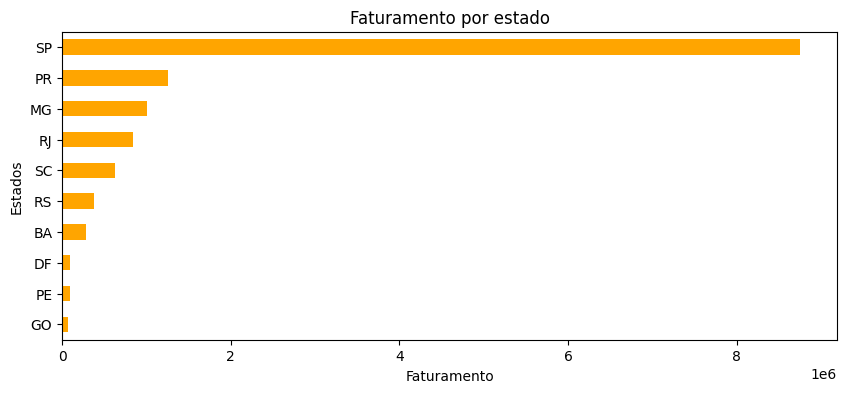

In [507]:
faturamento_estados.sort_values().tail(10).\
plot(
    kind='barh', figsize=(10,4), xlabel='Faturamento', ylabel='Estados', color='orange',
    title='Faturamento por estado'
    )

In [511]:
# Estados que faturam menos que a média
faturamento_estados < np.mean(vendedores_com_vendas.groupby('seller_state')['price'].sum())

seller_state
AC     True
AM     True
BA     True
CE     True
DF     True
ES     True
GO     True
MA     True
MG    False
MS     True
MT     True
PA     True
PB     True
PE     True
PI     True
PR    False
RJ    False
RN     True
RO     True
RS     True
SC    False
SE     True
SP    False
Name: price, dtype: bool